### User Inputs

In [ ]:
cd /g/data/r78/cb3058/dea-notebooks/ICE_project/
module use /g/data/v10/public/modules/modulefiles/
module load dea

In [1]:
shape_file = 'data/SA_aois2.shp'
masked_prop=0.90
polygon_Num = 1

In [2]:
# Import modules
import datacube 
from datacube.utils import geometry
import sys
import os
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import fiona

# Import external dea-notebooks functions using relative link to Scripts directory
sys.path.append('src/')
import DEADataHandling
import DEAPlotting

In [3]:
with fiona.open(shape_file) as shapes:
    crs = geometry.CRS(shapes.crs_wkt) 
    ShapesList = list(shapes)

first_geometry = ShapesList[polygon_Num]['geometry']
poly_name =ShapesList[polygon_Num]['properties']['name'].replace(' ','_')

geom = geometry.Geometry(first_geometry, crs=crs)

In [5]:
# Set up datacube instance
dc = datacube.Datacube(app='Time series animation')

# Set up spatial and temporal query.
# query1987_97 = {'geopolygon': geom,
#          'time': ('1987-01-01', '1997-12-31')
#          }

# query1998_08 = {'geopolygon': geom,
#          'time': ('1998-01-01', '2008-12-31')
#          }

# query2009_19 = {'geopolygon': geom,
#          'time': ('2009-01-01', '2019-04-30')
#          }

queryAllTime = {'y':(-35.155675, -35.449946),
                'x': (148.85, 149.35,
                 'time': ('2018-08-01', '2019-04-30')
                 }

# querysentinel = {'geopolygon': geom,
#          'time': ('2015-01-01', '2019-05-30')
#          }
# querysentinel['resolution'] = (-10,10)
# querysentinel['output_crs'] = ('epsg:3577')

In [ ]:
#loading sentinel 2
# ds_sentinel = DEADataHandling.load_clearsentinel2(dc=dc, query=querysentinel, 
#                                        bands_of_interest=['nbart_red', 'nbart_green', 'nbart_blue'], 
#                                        masked_prop=0.9, mask_pixel_quality=True) 

In [6]:
# Set the minimum proportion of clear pixels (pixels with no clouds or other nodata)
masked_prop=0.50
# Load in only clear Landsat observations with < 1% unclear values
# ds_1987_97 = DEADataHandling.load_clearlandsat(dc=dc, query=query1987_97, 
#                                        bands_of_interest=['red', 'green', 'blue'], 
#                                        masked_prop=masked_prop) 

# ds_1998_08 = DEADataHandling.load_clearlandsat(dc=dc, query=query1998_08, 
#                                        bands_of_interest=['red', 'green', 'blue'], 
#                                        masked_prop=masked_prop) 

# ds_2009_19 = DEADataHandling.load_clearlandsat(dc=dc, query=query2009_19, 
#                                        bands_of_interest=['red', 'green', 'blue'], 
#                                        masked_prop=masked_prop) 

ds_allTime = DEADataHandling.load_clearlandsat(dc=dc, query=queryAllTime, 
                                       bands_of_interest=['red', 'green', 'blue'], 
                                       masked_prop=masked_prop) 

Loading ls5 pixel quality
    Skipping ls5; no valid data for query
Ignoring SLC-off observations for ls7
Loading ls7 pixel quality
    Loading 0 filtered ls7 timesteps
Loading ls8 pixel quality
    Loading 18 filtered ls8 timesteps
Combining and sorting ls7, ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


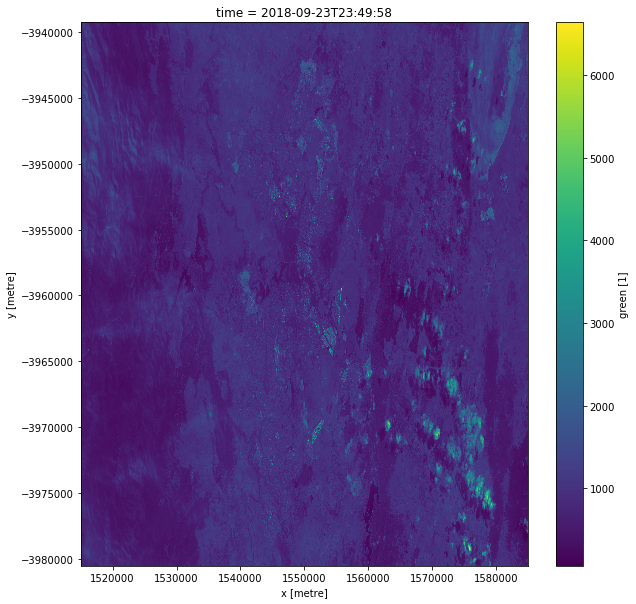

In [10]:
ds_allTime.green.isel(time=1).plot(figsize=(10,10))

In [ ]:
# #sentinel animation
# DEAPlotting.animated_timeseries(ds=ds_sentinel, bands=['nbart_red', 'nbart_green', 'nbart_blue'],
#                                 output_path="results/" + f'{poly_name}_sentinel_animated_timeseries.gif', 
#                                 interval=500)

In [ ]:
# Produce time series animation of red, green and blue bands
DEAPlotting.animated_timeseries(ds=ds_1987_97, 
                                output_path="results/" + f'{poly_name}_1987_97_animated_timeseries.gif', 
                                interval=500) 

In [ ]:
# Produce time series animation of red, green and blue bands
DEAPlotting.animated_timeseries(ds=ds_1998_08,
                                output_path="results/" + f'{poly_name}_1998_08_animated_timeseries.gif', 
                                interval=500) 

In [ ]:
# Produce time series animation of red, green and blue bands
DEAPlotting.animated_timeseries(ds=ds_2009_19,
                                output_path="results/"+ f'{poly_name}_2009_19_animated_timeseries.gif', 
                                interval=500) 

In [ ]:
DEAPlotting.animated_timeseries(ds=ds_allTime,
                                output_path="results/"+ f'{poly_name}_allTime_animated_timeseries.gif', 
                                interval=500) 